## 범주형 변수 (개별변수 분석: 단변량 분석)

* 범주형 변수는 범주별 빈도수와 비율을 확인함.

 - 리스트.count('값')
    : 해당 값이 몇 개 있는지 count
    
    count를 전체개수(len(gender))로 나눠주면 비율이 됨.
    
    범주가 두세개정도면 아래처럼 계산 가능

In [1]:
import matplotlib.pyplot as plt

size = ['B', 'S', 'S', 'B', 'B', 'B', 'S', 'B']

b_cnt = size.count('B')
s_cnt = size.count('S')
total_cnt = len(size)

print('B', b_cnt, b_cnt/total_cnt)
print('S', s_cnt, s_cnt/total_cnt)

B 5 0.625
S 3 0.375


In [ ]:
범주가 10개면 

   - pandas의 .value_counts()
    : 범주의 개수와 상관없이 범주별 개수 count

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

size = ['B', 'S', 'S', 'B', 'B', 'B', 'S', 'B']
size = pd.Series(size)

print(size.value_counts())
print(size.value_counts()/len(size))

B    5
S    3
dtype: int64
B    0.625
S    0.375
dtype: float64


1. DataFrame으로부터 범주형 변수의 수치화
 - value_counts()를 이용하여 범주별 빈도수와 범주별 비율을 구할 수 있음.

In [4]:
# titanic['Pclass'] 해석
import pandas as pd

titanic = pd.read_csv('https://bit.ly/TitanicFile')

print(titanic['Pclass'].value_counts())
print(titanic['Pclass'].value_counts()/len(titanic['Pclass']))

# 1등급 객실 탑승객 : 24% / 2등급 : 20.7% / 3등급 : 55% 차지

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


2. 범주형 변수의 시각화

1)Bar chart

**기본 형식**

plt.bar(범주이름, 값) / plt.barh(범주이름, 값)

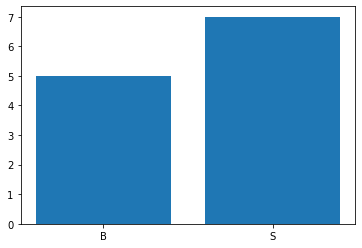

In [5]:
import matplotlib.pyplot as plt

size = ['B', 'S']
cnt = [5, 7]

plt.bar(size, cnt)
plt.show()

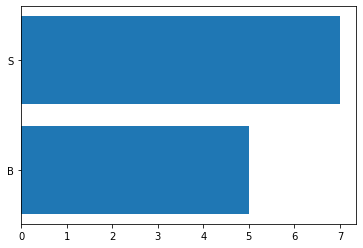

In [6]:
import matplotlib.pyplot as plt

size = ['B', 'S']
cnt = [5, 7]

plt.barh(size, cnt)
plt.show()

범주 이름과 값이 필요하므로 집계작업이 선행되어야 함.
pandas의 value_counts()를 사용하여 집계
집계결과의 index : 범주이름
집계결과의 values : 값

[5 3]
Index(['B', 'S'], dtype='object')


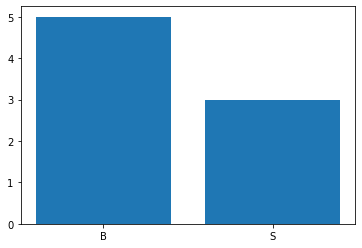

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

size = ['B', 'S', 'S', 'B', 'B', 'B', 'S', 'B']
size = pd.Series(size)

cnt = size.value_counts()
print(cnt.values)
print(cnt.index)

plt.bar(cnt.index, cnt.values)
plt.show()

Bar chart 꾸미기

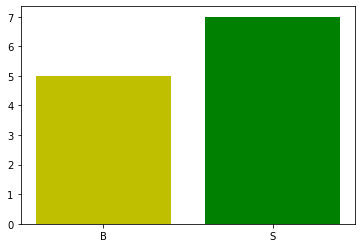

In [9]:
# bar별 색상 지정

import matplotlib.pyplot as plt

size = ['B', 'S']
cnt = [5, 7]

plt.bar(size, cnt, color=['y', 'g'])
plt.show()

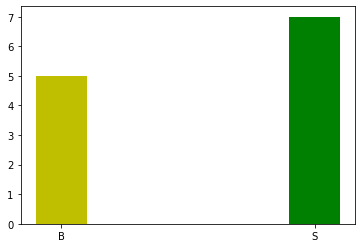

In [10]:
# bar별 폭 지정
import matplotlib.pyplot as plt

size = ['B', 'S']
cnt = [5, 7]

plt.bar(size, cnt, color=['y', 'g'], width=.2)
plt.show()

2) Pie chart
 - 범주별 비율 비교할 때 파이차트 사용
 
**기본 형식**

plt.pie(값, label=범주이름, autopct='%.2ㄹ%%')
 - autopct : 그래프에 표시할 값 비율에 대한 설정
 - .2f% :소수점 두 자리 퍼센트로 표기한다는 의미

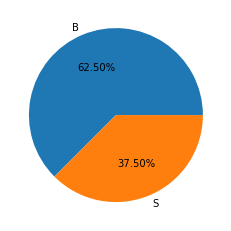

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

size = ['B', 'S', 'S', 'B', 'B', 'B', 'S', 'B']
size = pd.Series(size)

cnt = size.value_counts()

plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%')
plt.show()

Pie chart 꾸미기 ; 각도와 방향 조정
startangle=90 : 90도(9시가 0도)부터 시작
counterclock=False : 시계 방향

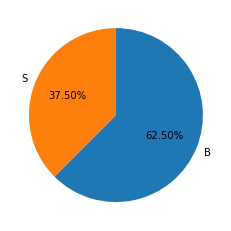

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

size = ['B', 'S', 'S', 'B', 'B', 'B', 'S', 'B']
size = pd.Series(size)

cnt = size.value_counts()

plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

파이차트 꾸미기 ; 간격 띄우고 그림자 넣기

explode=[0.05, 0.05] : 중심으로부터 B와 S를 얼마만큼 띄울지
shadow=True : 그림자 추가

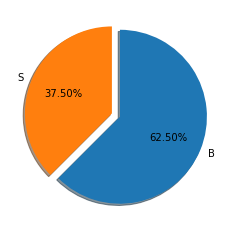

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

size = ['B', 'S', 'S', 'B', 'B', 'B', 'S', 'B']
size = pd.Series(size)

cnt = size.value_counts()

plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False, explode=[0.05, 0.05], shadow=True)
plt.show()

In [ ]:
데이터프레임으로부터 범주형 변수의 시각화

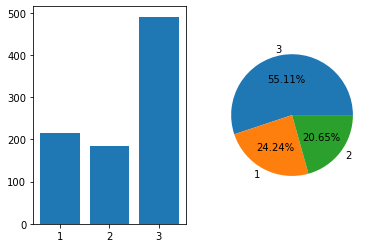

In [17]:
# titanic['Pclass'] 해석
import matplotlib.pyplot as plt
import pandas as pd

titanic = pd.read_csv('https://bit.ly/TitanicFile')

cnt = titanic['Pclass'].value_counts()

plt.subplot(1,2,1)
plt.bar(cnt.index, cnt.values)

plt.subplot(1,2,2)
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%')
plt.show()

# 수치화(기초통계량)을 통해 파악된 내용과 비교하여 특별한 것은 없음.

### 단변량 분석 추가 확인사항
개별 변수의 분포로부터

값의 범위 확인

데이터가 모여있는 구간(범주)와 희박한 구간(범주) 확인

이상치 확인

결측치 확인 및 조치 방안

가변수화, 스케일링 대상 선별

이상치 (Outlier)
: 대부분의 데이터에서 많이 벗어난 값
    대부분의 데이터가 가지고 있는 범위, 패턴에서 벗어난 값으로 대부분의 데이터와는 다른 메커니즘으로 발생된 데이터
    
    기준 (정답은 없으나 일반적인 기준은 아래와 같음)
    데이터의 분포가 정규분포에 가깝다면 3* 표준편차 바깥을 이상치로 봄.
    박스플롯의 수염 끝 fence 밖의 값들을 이상치로 봄. (정규분포라면 수염의 끝은 대략 3* 표준편차와 비슷해짐)
    
    모델링에서 이상치를 조치해야하는 알고리즘과 이상치에 영향을 받지 않는 알고리즘이 있음.
    모델링에서 이상치 조치는 필수가 아님.

결측치 (NaN : Not a Number)
NA(Not Available) 라고도 부름.
분석(모델링)에서 사용할 수 없는 값을 의미
모데링에서 결측치 조치는 필수!



결측치 확인하기
변수별 결측치 count
df.isna().sum() / df.isnull().sum()


결측치 시각화


결측치로 인한 오류
그래프의 기능에 따라 결측치가 있는 데이터 사용시 오류 발생될 수 있음.
이때 NaN을 제외하고 그래프를 그려야함. : .notnull()

In [ ]:
결측치 조회하기

해결방법
삭제
채우기